<a href="https://colab.research.google.com/github/MLEbyNoman/ArrayToolKit/blob/main/Entropy_Based_clustring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import files

uploaded = files.upload()

Saving bridge_vibration1.csv to bridge_vibration1.csv



Dataset Preview:

   ID   RMS
0   1  2.01
1   2  2.04
2   3  2.07
3   4  2.10
4   5  2.13

Final Results:

   ID   RMS  Probability   Entropy  Deviation  Region
0   1  2.01     0.093706  0.221858   0.008320  Inside
1   2  2.04     0.095105  0.223760   0.006417  Inside
2   3  2.07     0.096503  0.225642   0.004536  Inside
3   4  2.10     0.097902  0.227504   0.002674  Inside
4   5  2.13     0.099301  0.229345   0.000833  Inside
5   6  2.16     0.100699  0.231167   0.000989  Inside
6   7  2.19     0.102098  0.232969   0.002792  Inside
7   8  2.22     0.103497  0.234753   0.004575  Inside
8   9  2.25     0.104895  0.236517   0.006339  Inside
9  10  2.28     0.106294  0.238263   0.008085  Inside


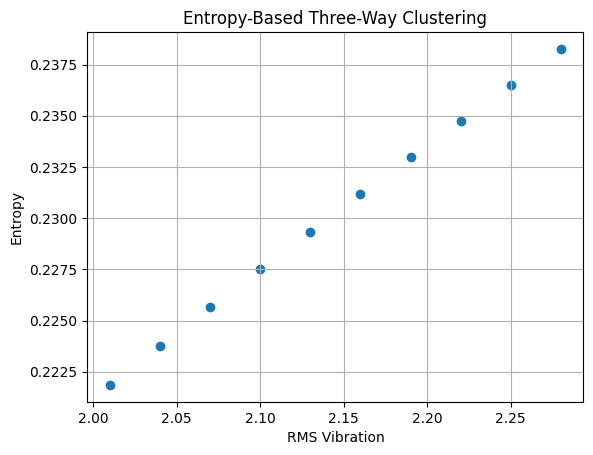


Region Counts:

Region
Inside    10
Name: count, dtype: int64


In [11]:
# =====================================================
# ENTROPY-BASED THREE-WAY CLUSTERING FOR SHM
# Complete Working Code with Real Dataset
# =====================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------------------------------
# STEP 1: Load Dataset
# -----------------------------------------------------

data = pd.read_csv("bridge_vibration1.csv")

print("\nDataset Preview:\n")
print(data.head())

X = data["RMS"].values

# -----------------------------------------------------
# STEP 2: Probability Distribution
# -----------------------------------------------------

prob = X / np.sum(X)

# -----------------------------------------------------
# STEP 3: Entropy Calculation
# -----------------------------------------------------

entropy = -prob * np.log(prob)

# -----------------------------------------------------
# STEP 4: Mean Entropy
# -----------------------------------------------------

mean_entropy = np.mean(entropy)

# -----------------------------------------------------
# STEP 5: Entropy Deviation
# -----------------------------------------------------

dev = np.abs(entropy - mean_entropy)

# -----------------------------------------------------
# STEP 6: Define Thresholds
# -----------------------------------------------------

alpha = 0.05
beta = 0.12

# -----------------------------------------------------
# STEP 7: Three-Way Clustering
# -----------------------------------------------------

region = []

for d in dev:

    if d <= alpha:
        region.append("Inside")

    elif d <= beta:
        region.append("Partial")

    else:
        region.append("Outside")

# -----------------------------------------------------
# STEP 8: Save Results
# -----------------------------------------------------

data["Probability"] = prob
data["Entropy"] = entropy
data["Deviation"] = dev
data["Region"] = region

data.to_csv("entropy_threeway_results.csv", index=False)

print("\nFinal Results:\n")
print(data)

# -----------------------------------------------------
# STEP 9: Visualization
# -----------------------------------------------------

plt.figure()

plt.scatter(X, entropy)

plt.xlabel("RMS Vibration")

plt.ylabel("Entropy")

plt.title("Entropy-Based Three-Way Clustering")

plt.grid()

plt.savefig("entropy_clustering_plot.png")

plt.show()

# -----------------------------------------------------
# STEP 10: Region Counts
# -----------------------------------------------------

print("\nRegion Counts:\n")

print(data["Region"].value_counts())